In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
cust = 'Customers.csv'
prod = 'Products.csv'
trans = 'Transactions.csv'

In [ ]:
cust_df = pd.read_csv(cust)
prod_df = pd.read_csv(prod)
trans_df = pd.read_csv(trans)

In [5]:
cust_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
prod_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
trans_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
cust_df.info

<bound method DataFrame.info of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>

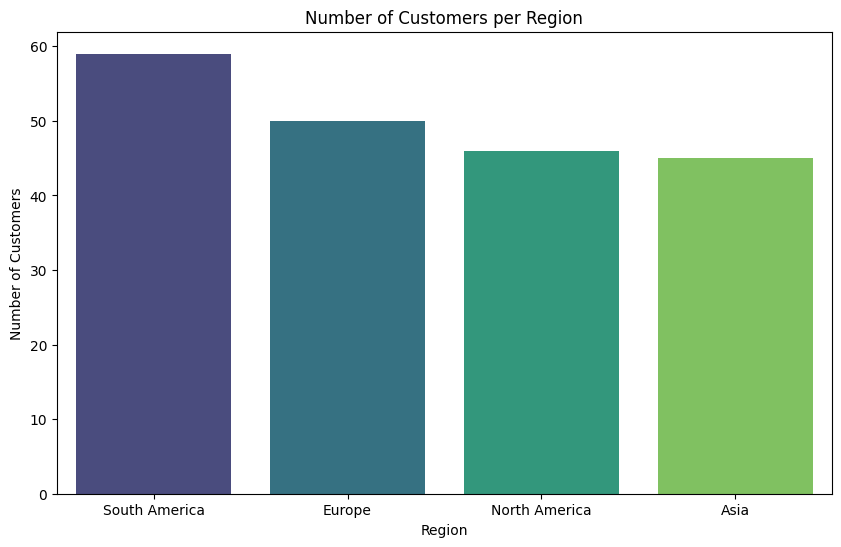

In [9]:
region_counts = cust_df['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
merged_data = pd.merge(trans_df, cust_df, on='CustomerID')

region_revenue = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
customer_count = cust_df['Region'].value_counts().reset_index()
customer_count.columns = ['Region', 'CustomerCount']

region_stats = pd.merge(region_revenue, customer_count, on='Region')
region_stats['RevenuePerCustomer'] = region_stats['TotalValue'] / region_stats['CustomerCount']

region_stats['HoverText'] = region_stats.apply(
    lambda x: f"Region: {x['Region']}<br>"
              f"Total Revenue: ${x['TotalValue']:,.2f}<br>"
              f"Total Customers: {x['CustomerCount']}<br>"
              f"Revenue/Customer: ${x['RevenuePerCustomer']:,.2f}", 
    axis=1
)

fig = px.pie(region_stats,
             values='TotalValue',
             names='Region',
             hover_data=['HoverText'],
             title='Revenue Distribution by Region with Customer Metrics',
             hole=0.3)

fig.update_traces(textposition='inside', 
                  textinfo='percent+label',
                  hovertemplate='%{customdata[0]}<extra></extra>')

fig.update_layout(
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()

In [10]:
cust_df['SignupDate'].dtype

dtype('O')

In [11]:
cust_df['SignupDate'] = pd.to_datetime(cust_df['SignupDate'])

In [12]:
cust_df['Year'] = cust_df['SignupDate'].dt.year
cust_df['Month'] = cust_df['SignupDate'].dt.month
cust_df['YearMonth'] = cust_df['SignupDate'].dt.to_period('M')

In [13]:
yearly_signups = cust_df['Year'].value_counts().sort_index()

In [14]:
monthly_signups = cust_df.groupby(['Year', 'Month']).size().reset_index(name='Signups')
monthly_signups['YearMonth'] = monthly_signups.apply(lambda x: f"{x['Year']}-{x['Month']:02d}", axis=1)


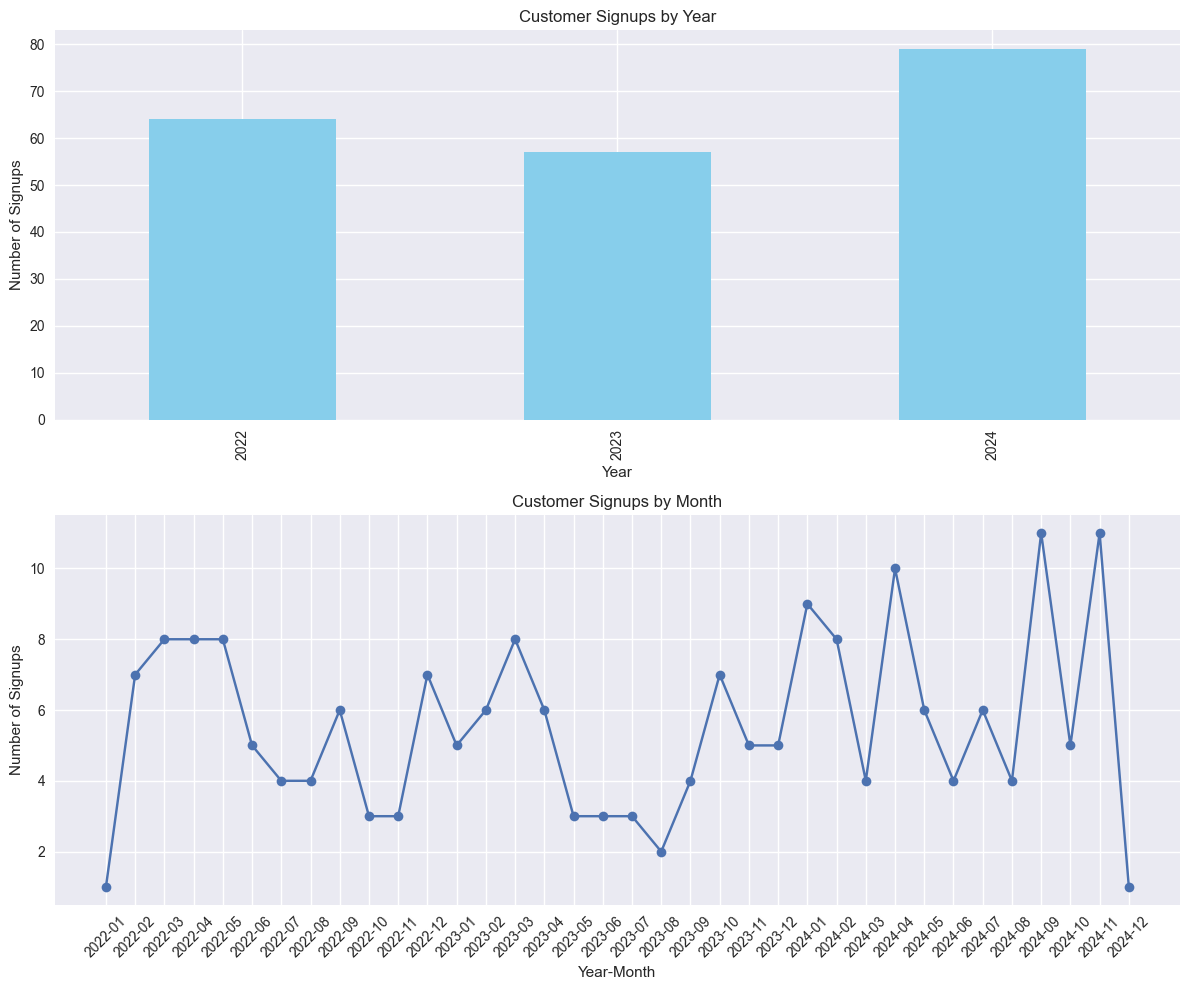

In [ ]:

plt.style.use('seaborn')
plt.figure(figsize=(12, 10))


plt.subplot(2, 1, 1)
yearly_signups.plot(kind='bar', color='skyblue')
plt.title('Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')


plt.subplot(2, 1, 2)

x_values = monthly_signups['YearMonth'].to_numpy()
y_values = monthly_signups['Signups'].to_numpy()
plt.plot(x_values, y_values, marker='o')
plt.title('Customer Signups by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

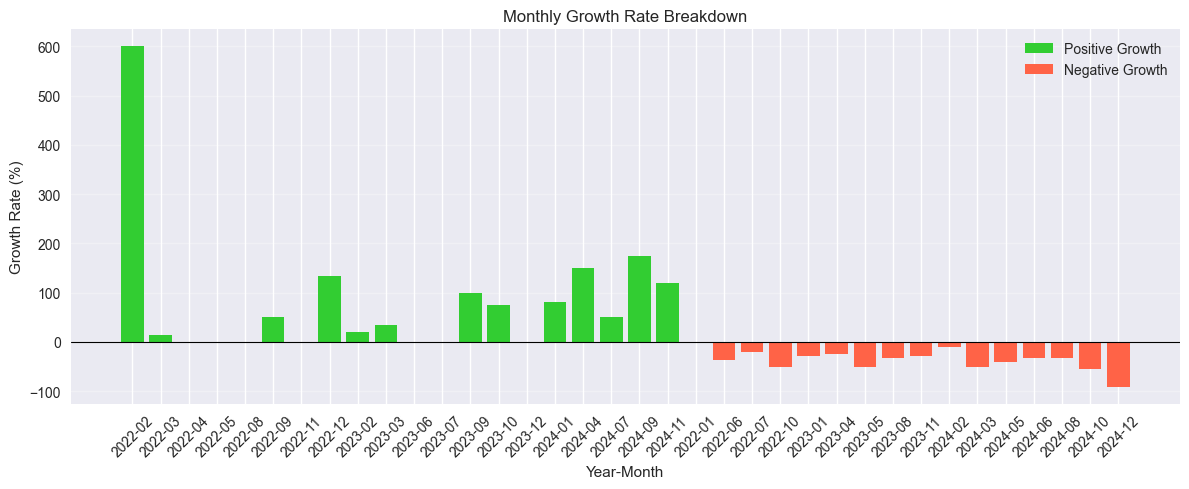


Average Growth Rate by Year:


Year
2022    62.738095
2023     5.238095
2024    21.813973
Name: GrowthRate, dtype: float64

In [16]:
monthly_signups['GrowthRate'] = monthly_signups['Signups'].pct_change() * 100
'''print("Month-over-Month Growth Rates:")
display(monthly_signups[['YearMonth', 'Signups', 'GrowthRate']])'''
plt.figure(figsize=(12, 5))
x = monthly_signups['YearMonth'].to_numpy()
y = monthly_signups['GrowthRate'].to_numpy()


positive = y >= 0
plt.bar(x[positive], y[positive], color='limegreen', label='Positive Growth')
plt.bar(x[~positive], y[~positive], color='tomato', label='Negative Growth')

plt.axhline(0, color='black', linewidth=0.8)
plt.title('Monthly Growth Rate Breakdown')
plt.xlabel('Year-Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


yearly_growth = monthly_signups.groupby('Year')['GrowthRate'].mean()
print("\nAverage Growth Rate by Year:")
display(yearly_growth)

posx and posy should be finite values
posx and posy should be finite values


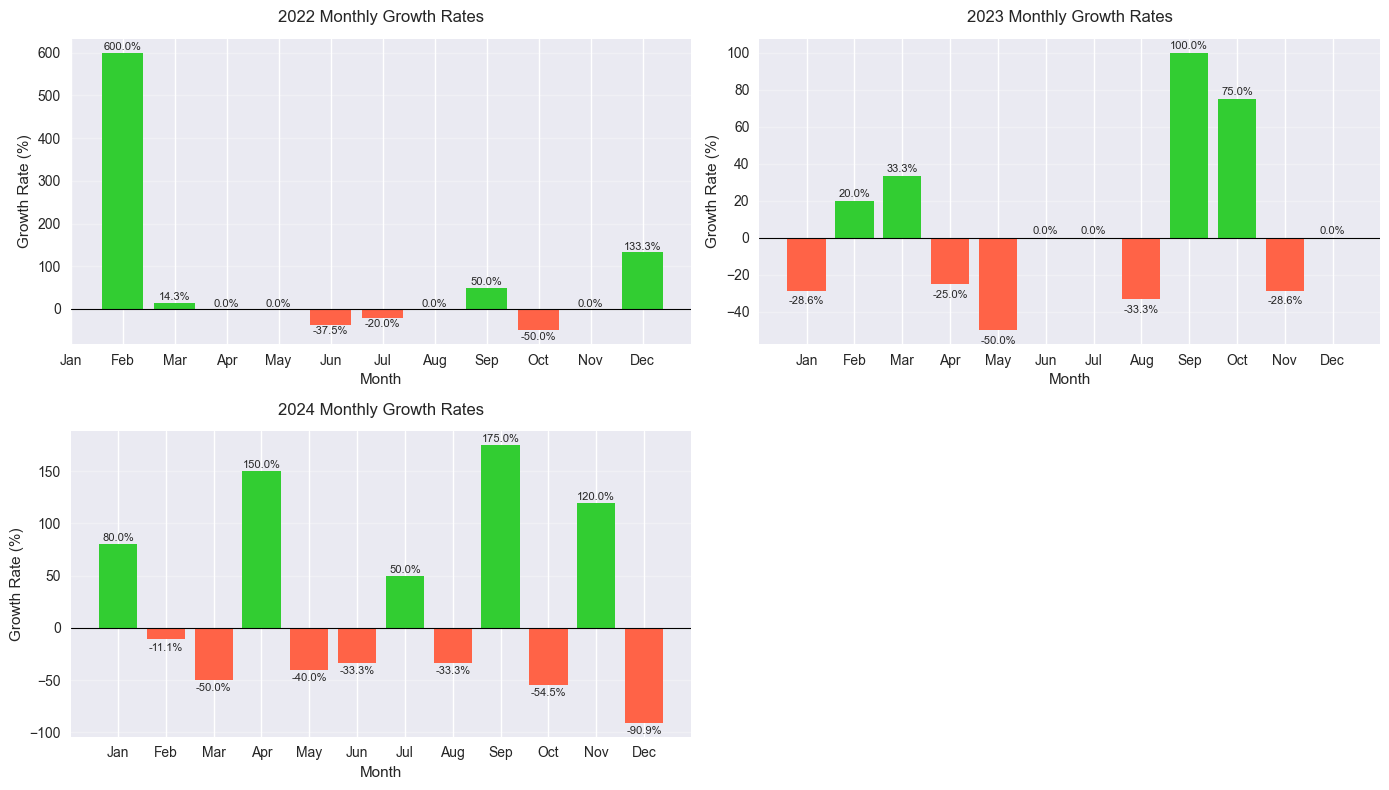

In [ ]:
import calendar
years = sorted(monthly_signups['Year'].unique())
n_years = len(years)
n_cols = 2
n_rows = (n_years + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
if n_rows == 1:
    axes = [axes]
for idx, year in enumerate(years):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row][col] if n_rows > 1 else axes[col]
    
    year_data = monthly_signups[monthly_signups['Year'] == year]
    months = year_data['Month'].to_numpy()
    growth_rates = year_data['GrowthRate'].to_numpy()
    
    bars = ax.bar(
        x=months,
        height=growth_rates,
        color=['limegreen' if rate >=0 else 'tomato' for rate in growth_rates]
    )
    
    ax.set_title(f'{year} Monthly Growth Rates', pad=12)
    ax.set_xlabel('Month')
    ax.set_ylabel('Growth Rate (%)')
    ax.set_xticks(months)
    ax.set_xticklabels([calendar.month_abbr[m] for m in months])
    ax.axhline(0, color='black', linewidth=0.8)
    ax.grid(axis='y', alpha=0.3)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 
                height + (1 if height >=0 else -3),
                f'{height:.1f}%',
                ha='center', 
                va='bottom' if height >=0 else 'top',
                fontsize=8)
for idx in range(len(years), n_rows*n_cols):
    row = idx // n_cols
    col = idx % n_cols
    if n_rows > 1:
        axes[row][col].axis('off')
    else:
        axes[col].axis('off')

plt.tight_layout()
plt.show()

In [18]:
print(f"\nTotal number of customers: {len(cust_df)}")
print(f"First signup date: {cust_df['SignupDate'].min()}")
print(f"Last signup date: {cust_df['SignupDate'].max()}")

print("\nBusiest signup months:")
busiest_months = monthly_signups.nlargest(5, 'Signups')[['YearMonth', 'Signups']]
display(busiest_months)


Total number of customers: 200
First signup date: 2022-01-22 00:00:00
Last signup date: 2024-12-28 00:00:00

Busiest signup months:


,YearMonth,Signups
32,2024-09,11
34,2024-11,11
27,2024-04,10
24,2024-01,9
2,2022-03,8


Products


In [19]:
prod_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [20]:
category_counts = prod_df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

<AxesSubplot:ylabel='Frequency'>

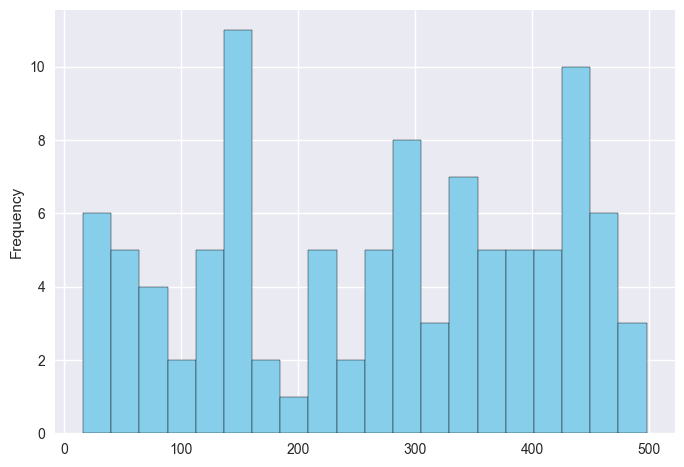

In [21]:
#Checking price distribution
prod_df['Price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

<AxesSubplot:xlabel='Category'>

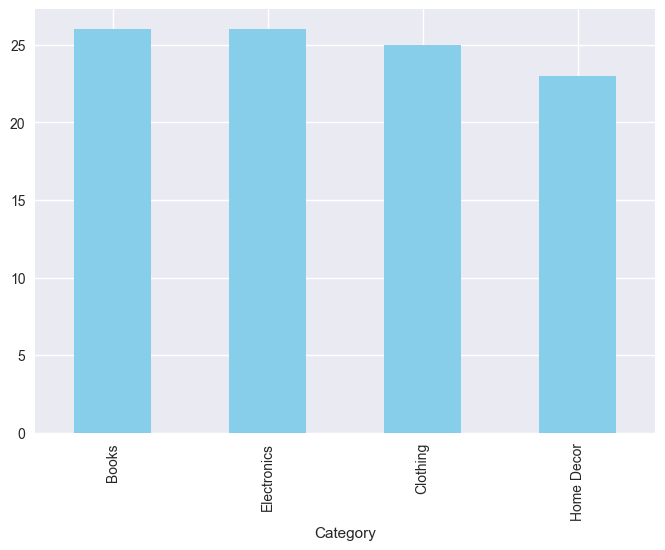

In [22]:
#Simply checking different types of product categories
prod_df['Category'].value_counts().plot(kind='bar', color='skyblue')

In [23]:
bins = [0, 100, 250, 500, float('inf')]
labels = ['0-100', '101-250', '251-500', '500+']
prod_df['PriceRange'] = pd.cut(prod_df['Price'], bins=bins, labels=labels)
price_range_counts = prod_df['PriceRange'].value_counts().sort_index().reset_index()
price_range_counts.columns = ['Range', 'Count']

In [24]:
import plotly.express as px
color_mapping = {
    'Electronics': '#0088FE',
    'Books': '#00C49F',
    'Home Decor': '#FFBB28',
    'Clothing': '#FF8042'
}
fig1 = px.pie(category_counts, 
             names='Category', 
             values='Count',
             title='Product Categories Distribution',
             color='Category',
             color_discrete_map=color_mapping)
fig1.show()

In [25]:
fig2 = px.bar(price_range_counts, 
             x='Range', 
             y='Count',
             title='Product Price Range Distribution',
             labels={'Count': 'Number of Products'},
             color='Range',
             color_discrete_sequence=['#8884d8']*len(price_range_counts))
fig2.show()

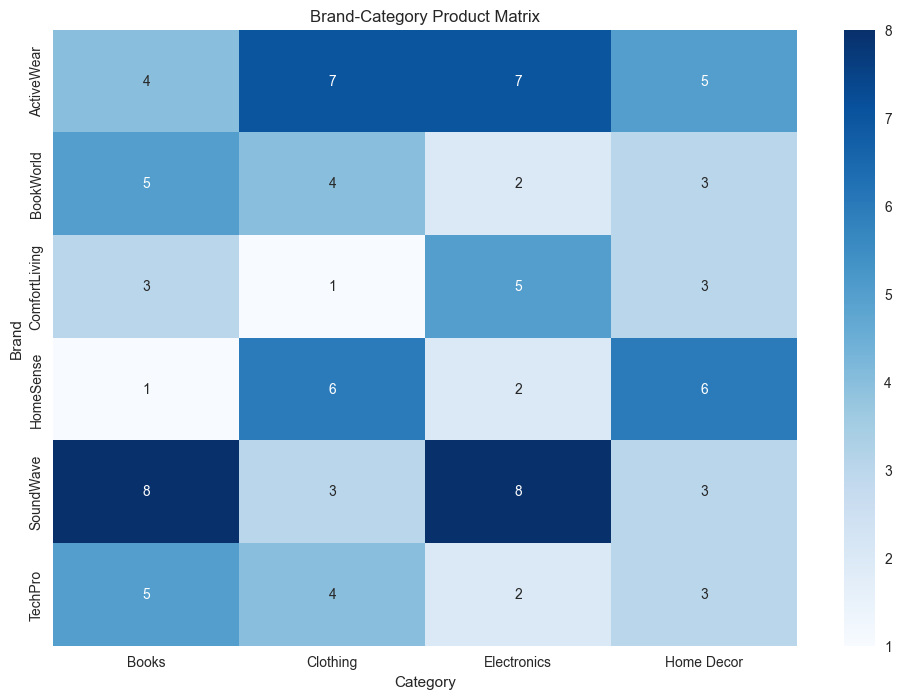

In [26]:
prod_df['Brand'] = prod_df['ProductName'].apply(lambda x: x.split()[0])
brand_category = pd.crosstab(prod_df['Brand'], prod_df['Category'])
plt.figure(figsize=(12, 8))
sns.heatmap(brand_category, cmap='Blues', annot=True, fmt='d')
plt.title('Brand-Category Product Matrix')
plt.xlabel('Category')
plt.ylabel('Brand')
plt.show()

Text(0.5, 1.0, 'Top 10 Brands by Product Count')

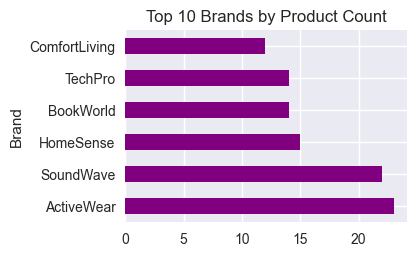

In [27]:
plt.subplot(2, 2, 3)
prod_df['Brand'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Brands by Product Count')

Transactions

In [28]:
trans_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [29]:
trans_df['TransactionDate'] = pd.to_datetime(trans_df['TransactionDate'])
trans_df['Month'] = trans_df['TransactionDate'].dt.month_name()
trans_df['DayOfWeek'] = trans_df['TransactionDate'].dt.day_name()
trans_df['Hour'] = trans_df['TransactionDate'].dt.hour
trans_df['WeekNumber'] = trans_df['TransactionDate'].dt.isocalendar().week

In [45]:
total_revenue = trans_df['TotalValue'].sum()
avg_order_value = trans_df['TotalValue'].mean()
total_transactions = trans_df['TransactionID'].nunique()
total_customers = trans_df['CustomerID'].nunique()
print(f"""Key Metrics:
- Total Revenue: ${total_revenue:,.2f}
- Average Order Value: ${avg_order_value:,.2f}
- Total Transactions: {total_transactions:,}
- Unique Customers: {total_customers:,}
""")

Key Metrics:
- Total Revenue: $689,995.56
- Average Order Value: $690.00
- Total Transactions: 1,000
- Unique Customers: 199



In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


product_performance = trans_df.groupby('ProductID').agg(
    TotalRevenue=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    AvgPrice=('Price', 'mean')
).sort_values('TotalRevenue', ascending=False).reset_index()

median_revenue = product_performance['TotalRevenue'].median()
underperforming_products = product_performance[product_performance['TotalRevenue'] < median_revenue]

In [41]:

fig = px.scatter(product_performance, 
                 x='AvgPrice', 
                 y='TotalQuantity',
                 size='TotalRevenue',
                 color='TotalRevenue',
                 hover_name='ProductID',
                 log_x=True,  
                 size_max=60,
                 title='<b>Price Elasticity Analysis</b><br><i>Bubble Size = Total Revenue Contribution</i>',
                 labels={
                     "AvgPrice": "Price per Unit (USD)",
                     "TotalQuantity": "Units Sold",
                     "TotalRevenue": "Revenue Contribution"
                 },
                 color_continuous_scale='sunset',
                 template='plotly_white')


fig.update_layout(
    shapes=[
        {'type': 'line', 'y0': 0, 'y1': 1, 'xref': 'paper', 'yref': 'paper',
         'x0': 0.5, 'x1': 0.5, 'y0': 0, 'y1': 1, 
         'line': {'color': 'RoyalBlue', 'width': 2}},
        {'type': 'line', 'x0': 150, 'x1': 150, 'y0': 0, 'y1': 1, 
         'yref': 'paper', 'line': {'color': 'Grey', 'dash': 'dot'}}
    ],
    annotations=[
        dict(text="Premium Zone", x=0.85, y=0.9, xref="paper", yref="paper",
             showarrow=False, font=dict(color="RoyalBlue")),
        dict(text="Value Zone", x=0.15, y=0.9, xref="paper", yref="paper",
             showarrow=False, font=dict(color="Grey"))
    ],
    xaxis=dict(
        range=[1.8, 3.2],  
        tickvals=[2, 2.5, 3],  
        ticktext=["$100", "$316", "$1,000"],
        title="Price per Unit (Log Scale)"
    ),
    yaxis=dict(
        range=[0, product_performance['TotalQuantity'].max()*1.1],
        title="Units Sold"
    ),
    coloraxis_colorbar=dict(
        title="Revenue (USD)",
        tickprefix="$",
        ticksuffix="k",
        tickvals=[0, 5000, 10000, 15000],
        ticktext=["0", "5", "10", "15"]
    )
)

fig.show()

In [60]:
# Calculate total revenue per category
category_revenue = prod_df.groupby('Category')['Price'].sum().reset_index()
category_revenue.columns = ['Category', 'TotalRevenue']



# Create a bar plot using Plotly
fig_category_revenue = px.bar(
    category_revenue,
    x='Category',
    y='TotalRevenue',
    title='Top Categories Driving Revenue',
    labels={'TotalRevenue': 'Total Revenue ($)', 'Category': 'Product Category'},
    color='TotalRevenue',
    color_continuous_scale='Blues'
)

fig_category_revenue.update_layout(
    xaxis=dict(categoryorder='total descending'),
    yaxis=dict(tickprefix='$', showgrid=True),
    hovermode='x unified',
    showlegend=False
)

fig_category_revenue.show()

In [56]:


fig_category_pie = px.pie(
    category_revenue,
    names='Category',
    values='TotalRevenue',
    title='Revenue Distribution by Category',
    color='Category',
    color_discrete_map=color_mapping
)

fig_category_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_category_pie.show()


In [61]:
top_10_products = product_performance.head(10).merge(prod_df[['ProductID', 'ProductName']], on='ProductID')
fig2 = px.bar(top_10_products,
             x='ProductName',
             y='TotalRevenue',
             color='TotalRevenue',
             text='TotalRevenue',
             title='<b>Top 10 Products by Revenue</b>',
             labels={'TotalRevenue': 'Revenue ($)', 'ProductName': 'Product Name'},
             color_continuous_scale='Tealgrn')

fig2.update_layout(
    xaxis=dict(categoryorder='total descending'),
    yaxis=dict(tickprefix='$', showgrid=True),
    hovermode='x unified',
    showlegend=False
)
fig2.update_traces(texttemplate='$%{text:,.2f}', textposition='outside')
fig2.show()

In [63]:
top_10_underperforming = underperforming_products.sort_values('TotalRevenue').head(10).merge(prod_df[['ProductID', 'ProductName']], on='ProductID')
fig3 = px.bar(top_10_underperforming,
             x='ProductName',
             y='TotalRevenue',
             color='TotalRevenue',
             text='TotalRevenue',
             title='<b>Top 10 Underperforming Products</b>',
             labels={'TotalRevenue': 'Revenue ($)', 'ProductName': 'Product Name'},
             color_continuous_scale='Hot')

fig3.update_layout(
    xaxis=dict(categoryorder='total ascending'),
    yaxis=dict(tickprefix='$', showgrid=True),
    hovermode='x unified',
    showlegend=False
)
fig3.update_traces(texttemplate='$%{text:,.2f}', textposition='outside')
fig3.show()

In [32]:
trans_df['DayOfWeek'] = trans_df['TransactionDate'].dt.day_name()
daily_trends = trans_df['DayOfWeek'].value_counts()
print("Transactions by Day of the Week:\n", daily_trends)

fig_daily_trends = px.bar(
    daily_trends,
    x=daily_trends.index,
    y=daily_trends.values,
    title="Transactions by Day of the Week",
    labels={"x": "Day of the Week", "y": "Number of Transactions"}
)
fig_daily_trends.show()

Transactions by Day of the Week:
 DayOfWeek
Tuesday      163
Wednesday    158
Thursday     150
Sunday       139
Monday       139
Saturday     126
Friday       125
Name: count, dtype: int64


In [33]:
monthly_trends = trans_df['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print("Monthly Transaction Trends:\n", monthly_trends)

fig_monthly_trends = px.line(
    x=monthly_trends.index.astype(str),
    y=monthly_trends.values,
    title="Monthly Transaction Trends",
    labels={"x": "Month", "y": "Number of Transactions"}
)
fig_monthly_trends.show()

Monthly Transaction Trends:
 TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


In [34]:
average_revenue = trans_df['TotalValue'].mean()
print("Average Revenue per Transaction: $", average_revenue)

# High-value transactions
top_transactions = trans_df[trans_df['TotalValue'] > trans_df['TotalValue'].quantile(0.95)]
print("High-Value Transactions (Top 5%):\n", top_transactions)

fig_high_value = px.scatter(
    top_transactions,
    x='TransactionID',
    y='TotalValue',
    title="High-Value Transactions",
    labels={"TransactionID": "Transaction ID", "TotalValue": "Total Value"}
)
fig_high_value.show()


Average Revenue per Transaction: $ 689.9955600000001
High-Value Transactions (Top 5%):
     TransactionID CustomerID ProductID     TransactionDate  Quantity  \
74         T00007      C0173      P023 2024-05-06 18:05:22         4   
82         T00997      C0164      P023 2024-11-01 23:04:56         4   
118        T00012      C0091      P041 2024-03-29 01:28:17         4   
119        T00034      C0168      P041 2024-01-09 11:00:50         4   
120        T00094      C0012      P041 2024-07-14 19:37:54         4   
125        T00482      C0066      P041 2024-06-04 02:02:24         4   
181        T00020      C0153      P007 2024-07-16 22:33:47         4   
182        T00163      C0101      P007 2024-03-13 22:33:34         4   
262        T00069      C0021      P086 2024-01-13 00:48:20         4   
263        T00193      C0041      P086 2024-06-10 11:46:13         4   
264        T00420      C0057      P086 2024-07-31 21:34:31         4   
265        T00493      C0126      P086 2024-11-2

In [66]:
customer_analysis = trans_df.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'nunique'),
    LastPurchase=('TransactionDate', 'max')
).sort_values('TotalSpent', ascending=False)
top_customers = customer_analysis.nlargest(5, 'TotalSpent')
print("\nTop 5 Customers by Lifetime Value:")
display(top_customers)


Top 5 Customers by Lifetime Value:


,TotalSpent,TransactionCount,LastPurchase
CustomerID,,,
C0141,10673.87,10,2024-12-03 21:22:02
C0054,8040.39,8,2024-10-07 17:48:28
C0065,7663.70,10,2024-12-13 21:18:19
C0156,7634.45,11,2024-12-15 00:35:54
C0082,7572.91,7,2024-11-30 07:11:48


In [35]:
bottom_products = product_performance[product_performance['TotalRevenue'] < product_performance['TotalRevenue'].median()]
print("\nUnderperforming Products (Revenue < Median):")
display(bottom_products)


Underperforming Products (Revenue < Median):


,TotalRevenue,TotalQuantity,AvgPrice
ProductID,,,
P075,12941.76,26,497.76
P086,12780.30,29,440.70
P050,12254.20,28,437.65
P017,12214.02,26,469.77
P094,12078.18,27,447.34
P043,11727.60,29,404.40
P084,11488.94,34,337.91
P032,11238.49,23,488.63
P076,11161.54,26,429.29
